In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('..\data\data.csv')

In [3]:
df2 = df.drop(columns=['index','ShipSpeed(v)','GTCompressorDecayStateCoefficient', 'TurbineInjectonControl(TIC)[%]'])

df2.columns

Index(['LeverPosition', 'GasTurbineShaftTorque[kNm]',
       'GT_rateofrevolutions(GTn)[rpm]',
       'GasGeneratorRateofRevolutions(GGn)[rpm]',
       'StarboardPropellerTorque(Ts)[kN]', 'PortPropellerTorque(Tp)[kN]',
       'HightPressure(HP)TurbineExitTemperature(T48)[C]',
       'GTCompressorInletAirTemperature(T1)[C]',
       'GTCompressorOutletAirTemperature(T2)[C]',
       'HPTurbineExitPressure(P48)[bar]',
       'GTCompressorInletAirPressure(P1)[bar]',
       'GTCompressorOutletAirPressure(P2)[bar]',
       'GTExhaustGasPressure(Pexh)[bar]', 'FuelFlow(mf)[kg/s]',
       'GTTurbineDecayStateCoefficient'],
      dtype='object')

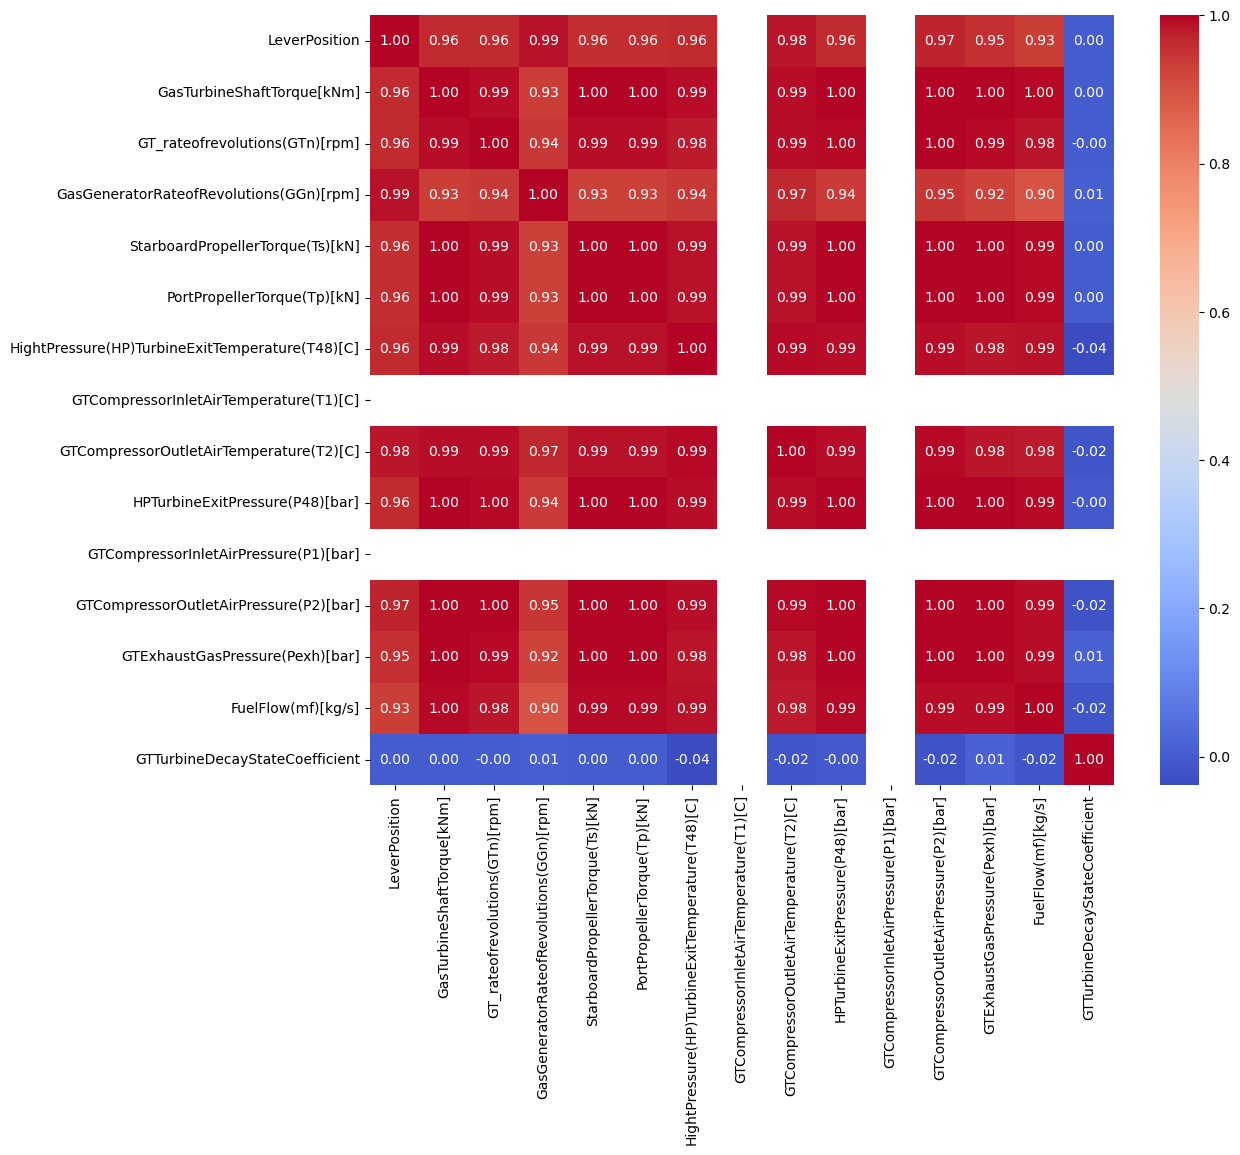

In [4]:
plt.figure(figsize=(12, 10))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.show()

In [5]:
df2.columns

Index(['LeverPosition', 'GasTurbineShaftTorque[kNm]',
       'GT_rateofrevolutions(GTn)[rpm]',
       'GasGeneratorRateofRevolutions(GGn)[rpm]',
       'StarboardPropellerTorque(Ts)[kN]', 'PortPropellerTorque(Tp)[kN]',
       'HightPressure(HP)TurbineExitTemperature(T48)[C]',
       'GTCompressorInletAirTemperature(T1)[C]',
       'GTCompressorOutletAirTemperature(T2)[C]',
       'HPTurbineExitPressure(P48)[bar]',
       'GTCompressorInletAirPressure(P1)[bar]',
       'GTCompressorOutletAirPressure(P2)[bar]',
       'GTExhaustGasPressure(Pexh)[bar]', 'FuelFlow(mf)[kg/s]',
       'GTTurbineDecayStateCoefficient'],
      dtype='object')

In [6]:
## Getting a basic look into how well my selected features predict decay for later model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

y = df['GTTurbineDecayStateCoefficient']
X = df[['LeverPosition', 'GasTurbineShaftTorque[kNm]', 'GT_rateofrevolutions(GTn)[rpm]',
             'GasGeneratorRateofRevolutions(GGn)[rpm]', 'StarboardPropellerTorque(Ts)[kN]',
             'PortPropellerTorque(Tp)[kN]', 'HightPressure(HP)TurbineExitTemperature(T48)[C]',
             'GTCompressorInletAirTemperature(T1)[C]', 'GTCompressorOutletAirTemperature(T2)[C]',
             'HPTurbineExitPressure(P48)[bar]', 'GTCompressorInletAirPressure(P1)[bar]',
             'GTCompressorOutletAirPressure(P2)[bar]', 'GTExhaustGasPressure(Pexh)[bar]',
             'FuelFlow(mf)[kg/s]']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 5.655655042450162e-06
R^2 Score: 0.8993163357722433


In [7]:
unique_values = df['LeverPosition'].unique()

print(unique_values)

[1.138 2.088 3.144 4.161 5.14  6.175 7.148 8.206 9.3  ]


In [8]:
num_bins = 9

bin_edges = np.linspace(df['LeverPosition'].min(), df['LeverPosition'].max(), num_bins + 1)

df['LeverPosition_bin'] = pd.cut(df['LeverPosition'], bins=bin_edges, labels=False, include_lowest=True)
df

,index,LeverPosition,ShipSpeed(v),GasTurbineShaftTorque[kNm],GT_rateofrevolutions(GTn)[rpm],GasGeneratorRateofRevolutions(GGn)[rpm],StarboardPropellerTorque(Ts)[kN],PortPropellerTorque(Tp)[kN],HightPressure(HP)TurbineExitTemperature(T48)[C],GTCompressorInletAirTemperature(T1)[C],GTCompressorOutletAirTemperature(T2)[C],HPTurbineExitPressure(P48)[bar],GTCompressorInletAirPressure(P1)[bar],GTCompressorOutletAirPressure(P2)[bar],GTExhaustGasPressure(Pexh)[bar],TurbineInjectonControl(TIC)[%],FuelFlow(mf)[kg/s],GTCompressorDecayStateCoefficient,GTTurbineDecayStateCoefficient,LeverPosition_bin
0,0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975,0
1,1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975,1
2,2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975,2
3,3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975,3
4,4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,11929,5.140,15,21624.934,1924.342,8470.013,175.239,175.239,681.658,288,628.950,2.087,0.998,10.990,1.027,23.803,0.471,1.00,1.000,4
11930,11930,6.175,18,29763.213,2306.745,8800.352,245.954,245.954,747.405,288,658.853,2.512,0.998,13.109,1.031,32.671,0.647,1.00,1.000,5
11931,11931,7.148,21,39003.867,2678.052,9120.889,332.389,332.389,796.457,288,680.393,2.982,0.998,15.420,1.036,42.104,0.834,1.00,1.000,6
11932,11932,8.206,24,50992.579,3087.434,9300.274,438.024,438.024,892.945,288,722.029,3.594,0.998,18.293,1.043,58.064,1.149,1.00,1.000,7


In [9]:
df["LeverPosition_bin"]

0        0
1        1
2        2
3        3
4        4
        ..
11929    4
11930    5
11931    6
11932    7
11933    8
Name: LeverPosition_bin, Length: 11934, dtype: int64

Mean Squared Error: 5.617358445084658e-06
R-squared: 0.9014216839479321


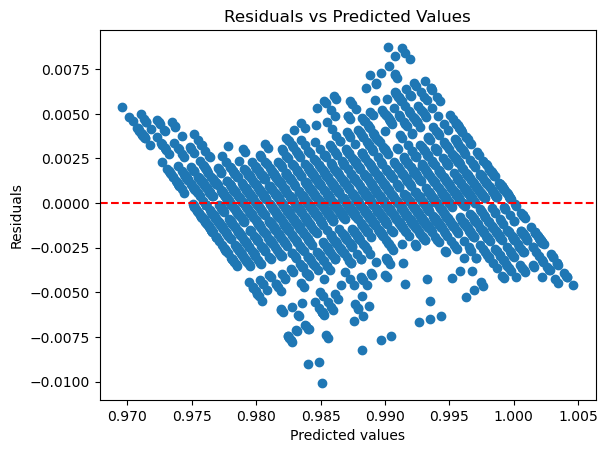

In [10]:
# Define features and target
features = ['LeverPosition_bin', 'GasTurbineShaftTorque[kNm]', 'GT_rateofrevolutions(GTn)[rpm]',
             'GasGeneratorRateofRevolutions(GGn)[rpm]', 'StarboardPropellerTorque(Ts)[kN]',
             'PortPropellerTorque(Tp)[kN]', 'HightPressure(HP)TurbineExitTemperature(T48)[C]',
             'GTCompressorInletAirTemperature(T1)[C]', 'GTCompressorOutletAirTemperature(T2)[C]',
             'HPTurbineExitPressure(P48)[bar]', 'GTCompressorInletAirPressure(P1)[bar]',
             'GTCompressorOutletAirPressure(P2)[bar]', 'GTExhaustGasPressure(Pexh)[bar]',
             'FuelFlow(mf)[kg/s]']

target = 'GTTurbineDecayStateCoefficient'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X_with_const = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print(vif_data)

                                            feature           VIF
0                                 LeverPosition_bin  3.207946e+02
1                        GasTurbineShaftTorque[kNm]  1.700982e+04
2                    GT_rateofrevolutions(GTn)[rpm]  1.181315e+03
3           GasGeneratorRateofRevolutions(GGn)[rpm]  1.723997e+02
4                  StarboardPropellerTorque(Ts)[kN]           inf
5                       PortPropellerTorque(Tp)[kN]           inf
6   HightPressure(HP)TurbineExitTemperature(T48)[C]  2.724388e+03
7            GTCompressorInletAirTemperature(T1)[C]  0.000000e+00
8           GTCompressorOutletAirTemperature(T2)[C]  9.982292e+02
9                   HPTurbineExitPressure(P48)[bar]  2.993740e+04
10            GTCompressorInletAirPressure(P1)[bar]  7.925735e-05
11           GTCompressorOutletAirPressure(P2)[bar]  5.654501e+03
12                  GTExhaustGasPressure(Pexh)[bar]  1.166306e+03
13                               FuelFlow(mf)[kg/s]  5.974946e+03


c:\Users\Blake\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\Blake\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [12]:
## VIF above shows GTCompressorOutletAirPressure(P2)[bar] and FuelFlow(mf)[kg/s]  5.974946e+03
## likely have high co-linearity that is scewing my model. Im taking them out.  I'm also combining 
## StarboardPropellerTorque(Ts)[kN] and PortPropellerTorque(Tp)[kN]


df["avg_prop_torque[kN]"] = ((df['StarboardPropellerTorque(Ts)[kN]'] + df['PortPropellerTorque(Tp)[kN]']) / 2)
df.columns

Index(['index', 'LeverPosition', 'ShipSpeed(v)', 'GasTurbineShaftTorque[kNm]',
       'GT_rateofrevolutions(GTn)[rpm]',
       'GasGeneratorRateofRevolutions(GGn)[rpm]',
       'StarboardPropellerTorque(Ts)[kN]', 'PortPropellerTorque(Tp)[kN]',
       'HightPressure(HP)TurbineExitTemperature(T48)[C]',
       'GTCompressorInletAirTemperature(T1)[C]',
       'GTCompressorOutletAirTemperature(T2)[C]',
       'HPTurbineExitPressure(P48)[bar]',
       'GTCompressorInletAirPressure(P1)[bar]',
       'GTCompressorOutletAirPressure(P2)[bar]',
       'GTExhaustGasPressure(Pexh)[bar]', 'TurbineInjectonControl(TIC)[%]',
       'FuelFlow(mf)[kg/s]', 'GTCompressorDecayStateCoefficient',
       'GTTurbineDecayStateCoefficient', 'LeverPosition_bin',
       'avg_prop_torque[kN]'],
      dtype='object')

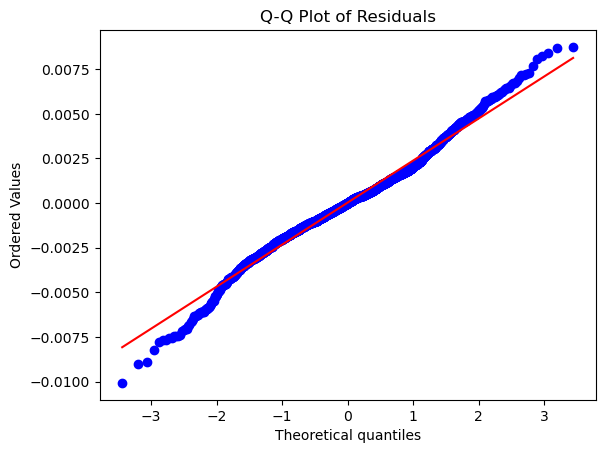

In [13]:
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

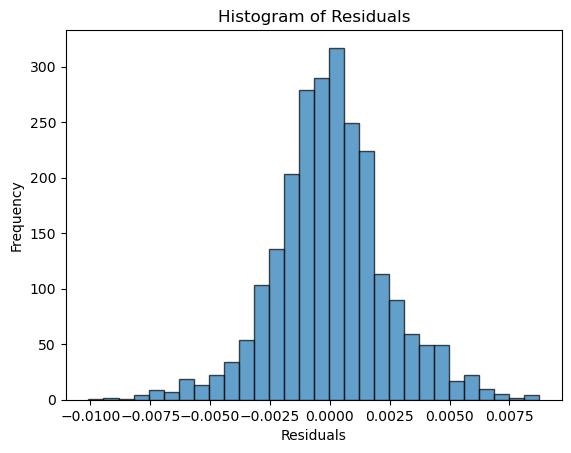

In [14]:
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

Mean Squared Error: 8.358698220888362e-06
R-squared: 0.8533142573937753


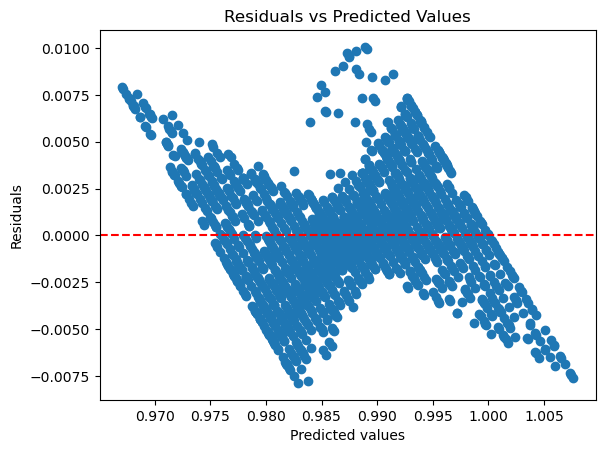

In [15]:
##Running same tests with columns removed

features = ['LeverPosition_bin', 'GasTurbineShaftTorque[kNm]', 'GT_rateofrevolutions(GTn)[rpm]',
             'GasGeneratorRateofRevolutions(GGn)[rpm]', 'HightPressure(HP)TurbineExitTemperature(T48)[C]',
             'HPTurbineExitPressure(P48)[bar]','GTExhaustGasPressure(Pexh)[bar]', 
             'avg_prop_torque[kN]', 'GTCompressorOutletAirPressure(P2)[bar]']

target = 'GTTurbineDecayStateCoefficient'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

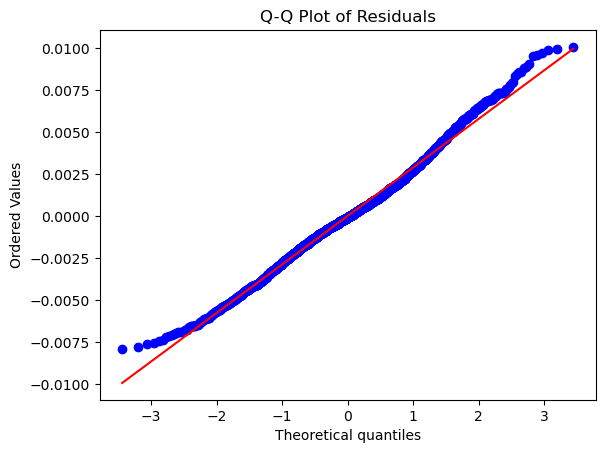

In [16]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

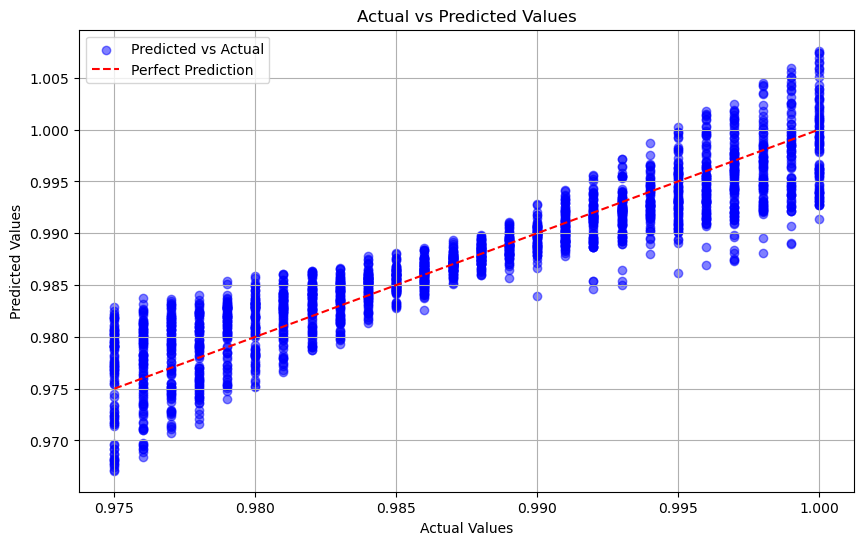

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X_with_const = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print(vif_data)

                                           feature           VIF
0                                            const  1.086379e+07
1                                LeverPosition_bin  8.431256e+01
2                       GasTurbineShaftTorque[kNm]  9.883760e+03
3                   GT_rateofrevolutions(GTn)[rpm]  8.068440e+02
4          GasGeneratorRateofRevolutions(GGn)[rpm]  5.492001e+01
5  HightPressure(HP)TurbineExitTemperature(T48)[C]  5.438337e+02
6                  HPTurbineExitPressure(P48)[bar]  1.937784e+04
7                  GTExhaustGasPressure(Pexh)[bar]  1.123034e+03
8                              avg_prop_torque[kN]  2.503437e+03
9           GTCompressorOutletAirPressure(P2)[bar]  4.749749e+03


In [19]:
##Trying a poly fit make this match a little better.

Mean Squared Error: 3.9397409445288364e-08
R-squared: 0.9993086198223066


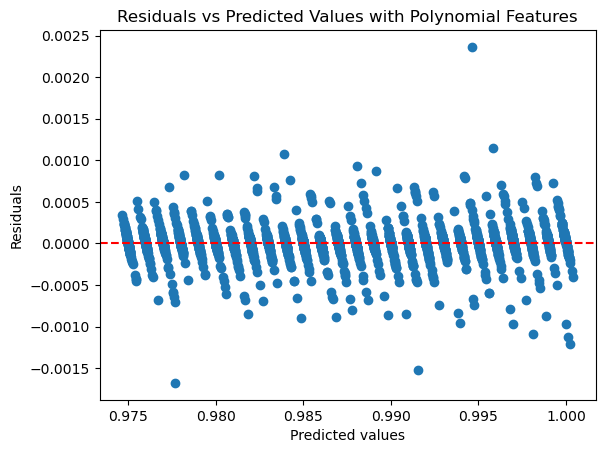

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values with Polynomial Features')
plt.show()

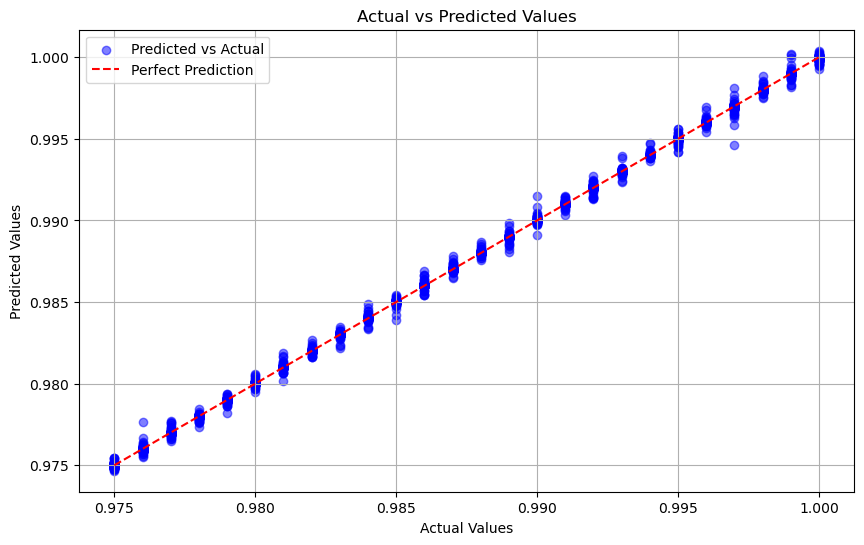

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

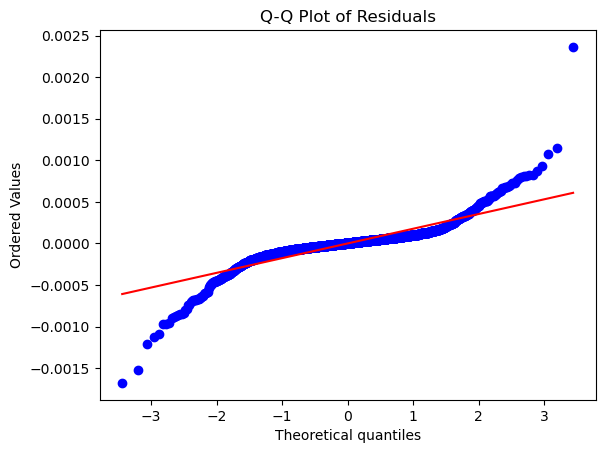

In [22]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

Mean Squared Error: 3.6156739651282775e-09
R-squared: 0.9999365489928478


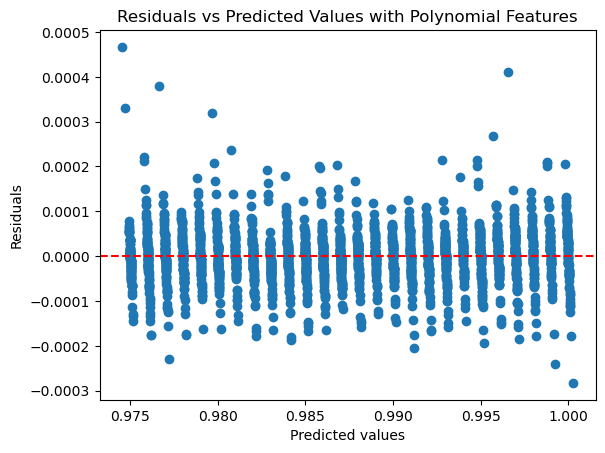

In [23]:
## QQ plot is incredibly divergent at the head and tail.  Adding some columns back in as a test.

features = ['LeverPosition', 'GasTurbineShaftTorque[kNm]',
       'GT_rateofrevolutions(GTn)[rpm]',
       'GasGeneratorRateofRevolutions(GGn)[rpm]',
       'HightPressure(HP)TurbineExitTemperature(T48)[C]',
       'GTCompressorInletAirTemperature(T1)[C]',
       'GTCompressorOutletAirTemperature(T2)[C]',
       'HPTurbineExitPressure(P48)[bar]',
       'GTCompressorInletAirPressure(P1)[bar]',
       'GTCompressorOutletAirPressure(P2)[bar]',
       'GTExhaustGasPressure(Pexh)[bar]',
       'GTCompressorDecayStateCoefficient',
       'LeverPosition_bin',
       'avg_prop_torque[kN]']

target = 'GTTurbineDecayStateCoefficient'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values with Polynomial Features')
plt.show()


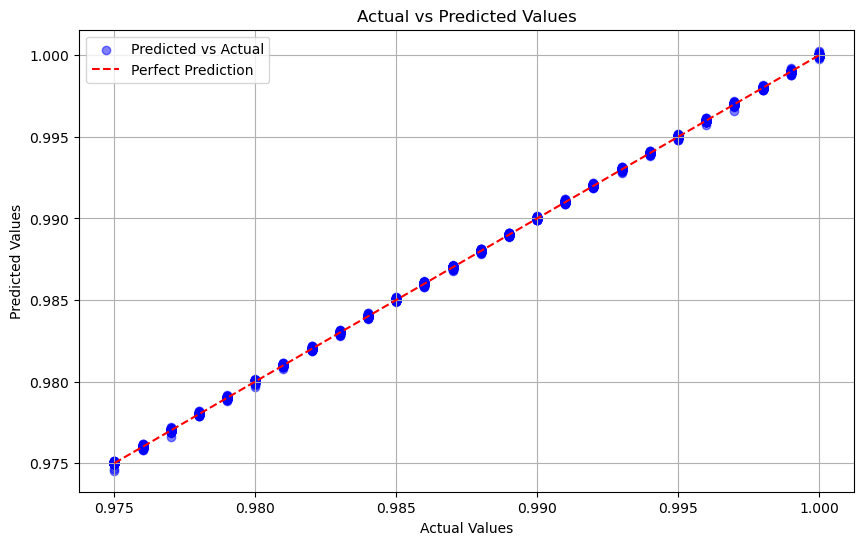

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

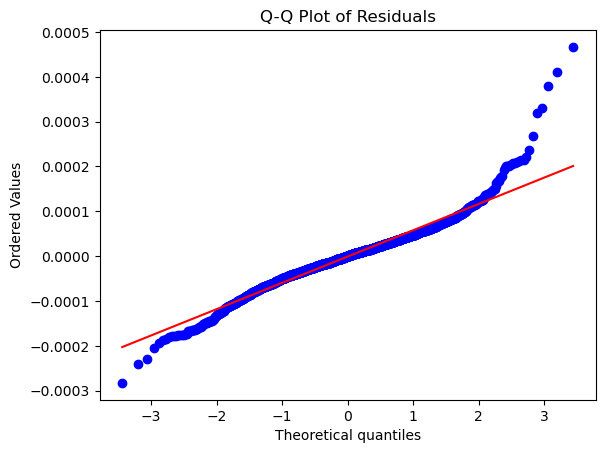

In [25]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

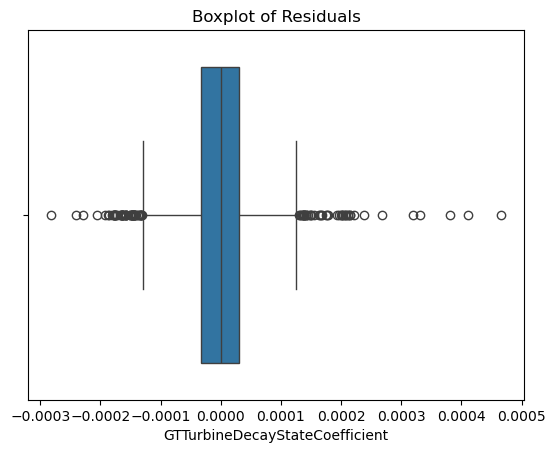

In [26]:
sns.boxplot(x=residuals)
plt.title('Boxplot of Residuals')
plt.show()

In [27]:
z_scores = np.abs((residuals - np.mean(residuals)) / np.std(residuals))
outliers = np.where(z_scores > 3)
print("Outliers at indices:", outliers)

Outliers at indices: (array([   9,   71,  218,  249,  290,  379,  388,  513,  617,  644,  703,
        803, 1001, 1308, 1373, 1408, 1433, 1467, 1471, 1557, 1569, 1581,
       1620, 1820, 1955, 2098, 2246, 2292], dtype=int64),)


In [28]:
# Indices of the outliers
outliers = [9, 71, 218, 249, 290, 379, 388, 513, 617, 644, 703, 803, 1001, 1308, 1373, 1408, 1433, 1467, 1471, 1557, 1569, 1581, 1620, 1820, 1955, 2098, 2246, 2292]

# Remove outliers
df_cleaned = df.drop(index=outliers)

# Check the shape of the cleaned dataframe
print(df_cleaned.shape)

(11906, 21)


Mean Squared Error: 3.5840570111790246e-09
R-squared: 0.9999374560267993


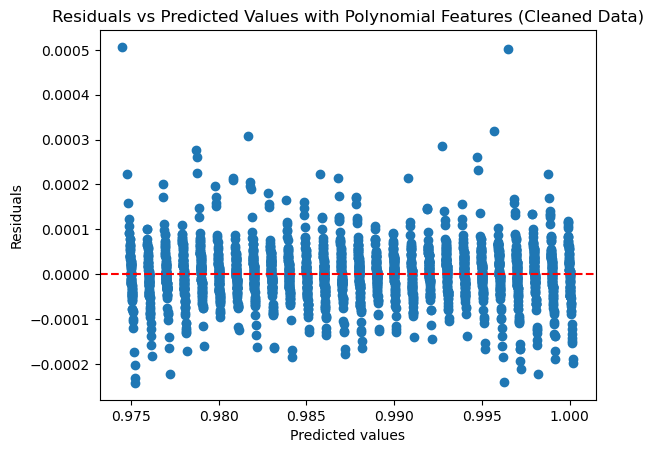

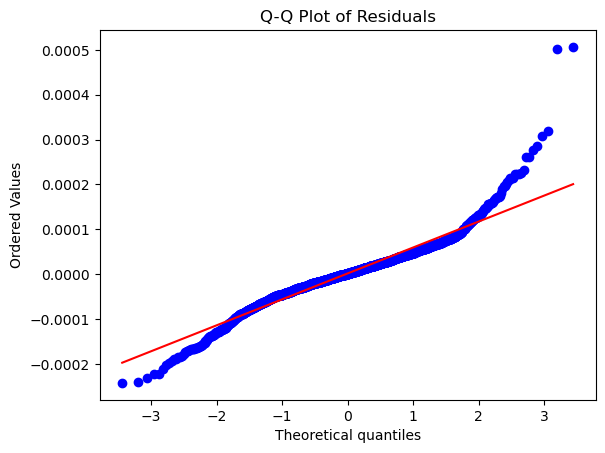

In [29]:
# Define features and target
features = ['LeverPosition', 'GasTurbineShaftTorque[kNm]',
            'GT_rateofrevolutions(GTn)[rpm]',
            'GasGeneratorRateofRevolutions(GGn)[rpm]',
            'HightPressure(HP)TurbineExitTemperature(T48)[C]',
            'GTCompressorInletAirTemperature(T1)[C]',
            'GTCompressorOutletAirTemperature(T2)[C]',
            'HPTurbineExitPressure(P48)[bar]',
            'GTCompressorInletAirPressure(P1)[bar]',
            'GTCompressorOutletAirPressure(P2)[bar]',
            'GTExhaustGasPressure(Pexh)[bar]',
            'GTCompressorDecayStateCoefficient',
            'LeverPosition_bin',
            'avg_prop_torque[kN]']

target = 'GTTurbineDecayStateCoefficient'

# Splitting data into features and target
X = df_cleaned[features]
y = df_cleaned[target]

# Split the cleaned data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the model with polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot Residuals vs Predicted Values
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values with Polynomial Features (Cleaned Data)')
plt.show()

# QQ Plot for residuals
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

Mean Squared Error: 7.539602490592084e-09
R-squared: 0.9998676884652297


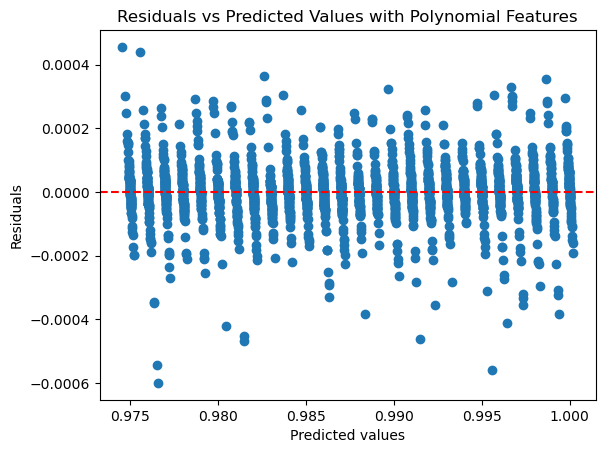

In [30]:
## Using a log transformation to account for diverging head and tail.

from sklearn.linear_model import HuberRegressor

features = ['LeverPosition', 'GasTurbineShaftTorque[kNm]',
       'GT_rateofrevolutions(GTn)[rpm]',
       'GasGeneratorRateofRevolutions(GGn)[rpm]',
       'HightPressure(HP)TurbineExitTemperature(T48)[C]',
       'GTCompressorInletAirTemperature(T1)[C]',
       'GTCompressorOutletAirTemperature(T2)[C]',
       'HPTurbineExitPressure(P48)[bar]',
       'GTCompressorInletAirPressure(P1)[bar]',
       'GTCompressorOutletAirPressure(P2)[bar]',
       'GTExhaustGasPressure(Pexh)[bar]',
       'LeverPosition_bin',
       'avg_prop_torque[kN]']

target = 'GTTurbineDecayStateCoefficient'

X = df[features]
y = df[target]

#y_transformed, lambda_ = boxcox(y + np.abs(min(y)) + 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

poly = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values with Polynomial Features')
plt.show()

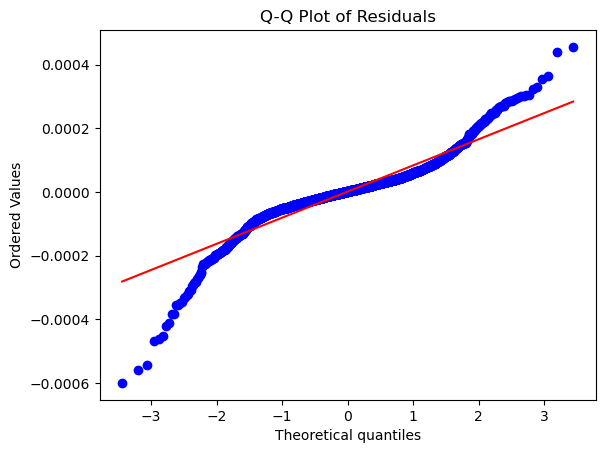

In [31]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

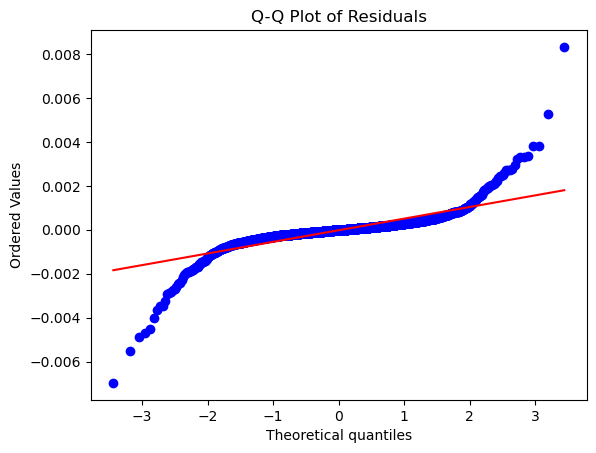

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
residuals_rf = y_test - y_pred_rf

# QQ plot for Random Forest residuals
stats.probplot(residuals_rf, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

                               QuantReg Regression Results                                
Dep. Variable:     GTTurbineDecayStateCoefficient   Pseudo R-squared:               0.6517
Model:                                   QuantReg   Bandwidth:                   0.0005909
Method:                             Least Squares   Sparsity:                     0.005923
Date:                            Mon, 05 Aug 2024   No. Observations:                 9547
Time:                                    15:27:49   Df Residuals:                     9537
                                                    Df Model:                            9
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                               0.5010      0.001    399.220      0.000       0.499       0.503
LeverPosition_b

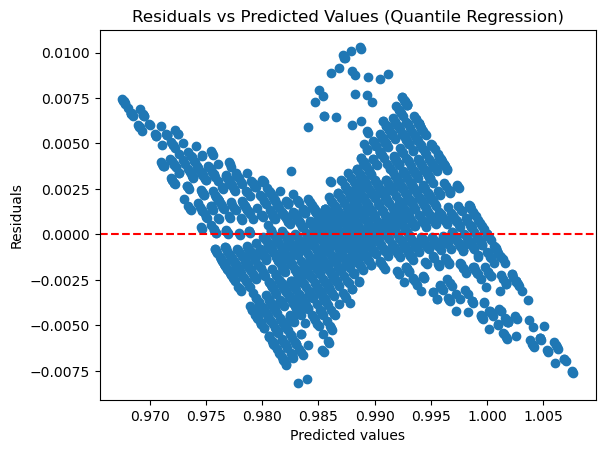

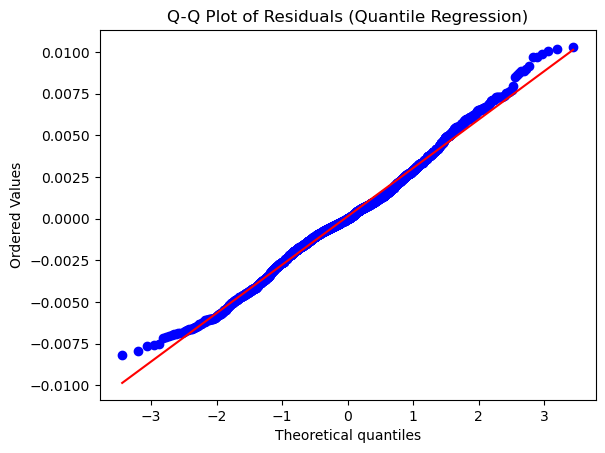

In [33]:
## Trying standard linear with target transformations:

from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from statsmodels.regression.quantile_regression import QuantReg
import statsmodels.api as sm

features = ['LeverPosition_bin', 'GasTurbineShaftTorque[kNm]', 'GT_rateofrevolutions(GTn)[rpm]',
            'GasGeneratorRateofRevolutions(GGn)[rpm]', 'HightPressure(HP)TurbineExitTemperature(T48)[C]',
            'HPTurbineExitPressure(P48)[bar]', 'GTExhaustGasPressure(Pexh)[bar]', 
            'avg_prop_torque[kN]', 'GTCompressorOutletAirPressure(P2)[bar]']

target = 'GTTurbineDecayStateCoefficient'

# Splitting data into features and target
X = df[features]
y = df[target]

# Add a constant term to the predictors for the intercept
X_with_const = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_const, y, test_size=0.2, random_state=42)

# Fit Quantile Regression Model for the median (0.5 quantile)
quantile = 0.5
model = QuantReg(y_train, X_train)
res = model.fit(q=quantile)

# Print model summary
print(res.summary())

# Predict on the test set
y_pred = res.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot Residuals vs Predicted Values
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Quantile Regression)')
plt.show()

# QQ plot for residuals
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (Quantile Regression)')
plt.show()


Mean Squared Error (WLS): 8.35869822088233e-06
R-squared (WLS): 0.8533142573938812


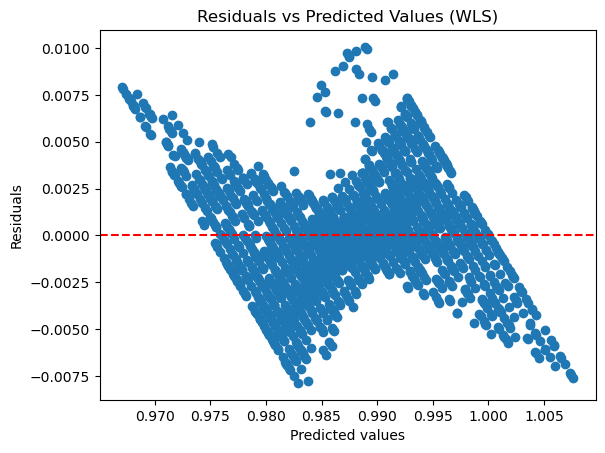

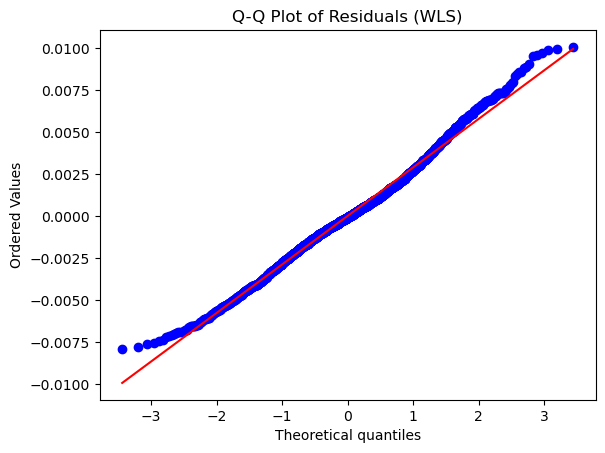

In [34]:
## Trying standard linear with a target transformations:

features = ['LeverPosition_bin', 'GasTurbineShaftTorque[kNm]', 'GT_rateofrevolutions(GTn)[rpm]',
             'GasGeneratorRateofRevolutions(GGn)[rpm]', 'HightPressure(HP)TurbineExitTemperature(T48)[C]',
             'HPTurbineExitPressure(P48)[bar]','GTExhaustGasPressure(Pexh)[bar]', 
             'avg_prop_torque[kN]', 'GTCompressorOutletAirPressure(P2)[bar]']

target = 'GTTurbineDecayStateCoefficient'

X = df[features]
y = df[target]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit the model using WLS
wls_model = sm.WLS(y_train, X_train_const).fit()

# Predict
y_pred_wls = wls_model.predict(X_test_const)

# Evaluate the model
mse_wls = mean_squared_error(y_test, y_pred_wls)
r2_wls = r2_score(y_test, y_pred_wls)

print(f'Mean Squared Error (WLS): {mse_wls}')
print(f'R-squared (WLS): {r2_wls}')

# Plot Residuals vs Predicted Values
residuals_wls = y_test - y_pred_wls
plt.scatter(y_pred_wls, residuals_wls)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (WLS)')
plt.show()

# QQ plot for residuals
stats.probplot(residuals_wls, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (WLS)')
plt.show()

Mean Squared Error: 1.6580428247424448e-05
R-squared: 0.7090321523841072


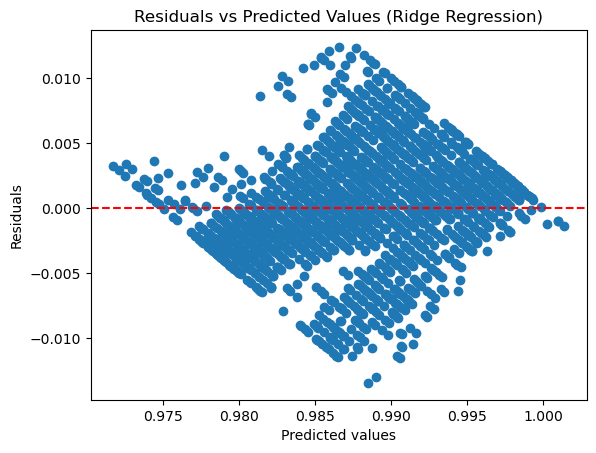

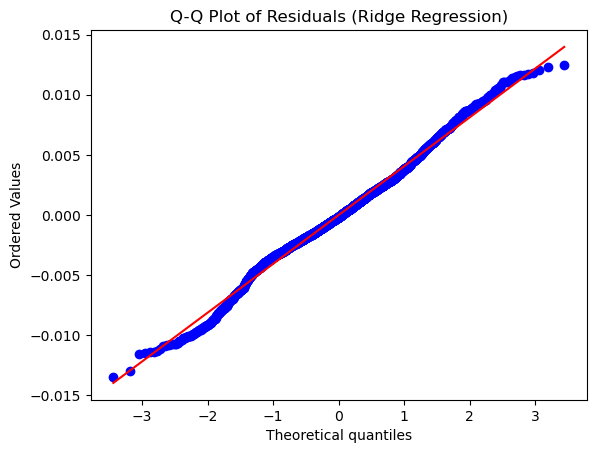

In [45]:

from sklearn.linear_model import Ridge


# Define features and target
features = ['LeverPosition_bin', 'GasTurbineShaftTorque[kNm]', 'GT_rateofrevolutions(GTn)[rpm]',
             'GasGeneratorRateofRevolutions(GGn)[rpm]','avg_prop_torque[kN]', 'HightPressure(HP)TurbineExitTemperature(T48)[C]',
             'GTCompressorOutletAirTemperature(T2)[C]',
             'HPTurbineExitPressure(P48)[bar]', 'GTCompressorInletAirPressure(P1)[bar]',
             'GTCompressorOutletAirPressure(P2)[bar]', 'GTExhaustGasPressure(Pexh)[bar]',
             'FuelFlow(mf)[kg/s]']

target = 'GTTurbineDecayStateCoefficient'

# Splitting data into features and target
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Ridge Regression model
ridge_model = Ridge(alpha=100) 

# Fit the model
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot Residuals vs Predicted Values
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Ridge Regression)')
plt.show()

# QQ plot for residuals
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (Ridge Regression)')
plt.show()

Mean Absolute Error: 0.0030096401230423034
Root Mean Squared Error: 0.003957019231000629
Mean Absolute Percentage Error: 0.30475276069468055%
R-squared: 0.7252197085897937
Cross-Validation R-squared: 0.6657548618330026
Adjusted R Square: 0.7239470419769464


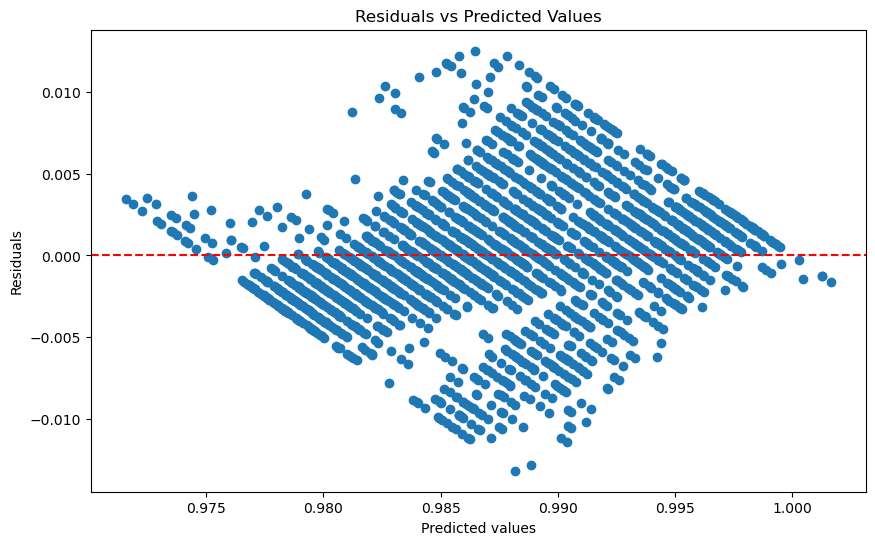

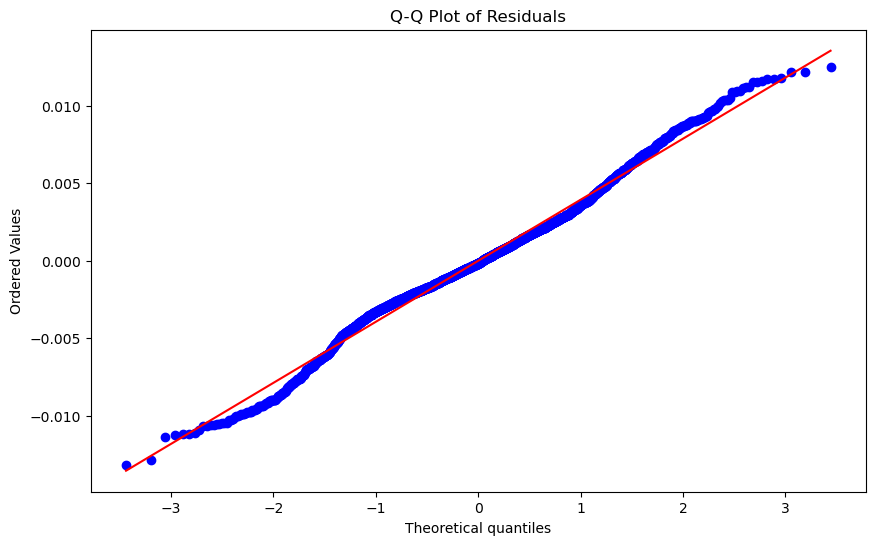

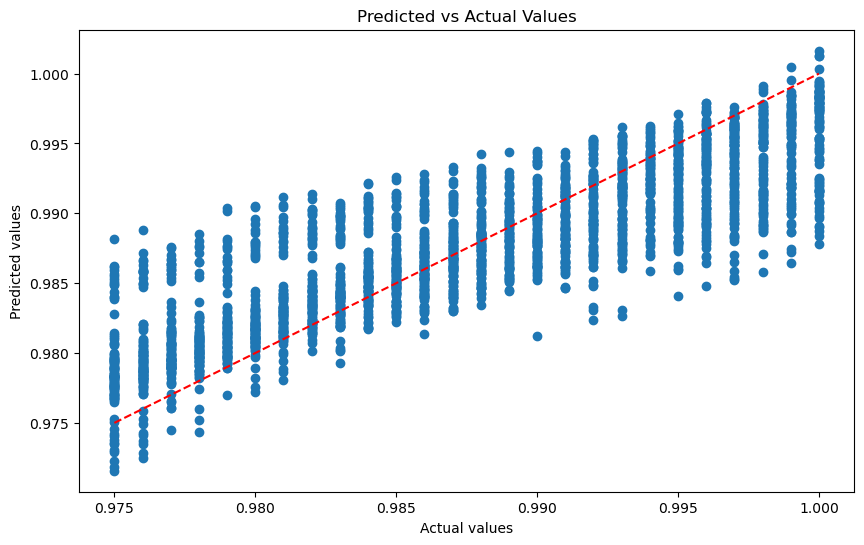

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import joblib

# Load the pre-trained model
model = joblib.load('../models/ridge_model.joblib')

# Load the data
data = pd.read_csv('../data/data.csv')

# Feature engineering
num_bins = 9
bin_edges = np.linspace(data['LeverPosition'].min(), data['LeverPosition'].max(), num_bins + 1)
data['LeverPosition_bin'] = pd.cut(data['LeverPosition'], bins=bin_edges, labels=False, include_lowest=True)
data["avg_prop_torque[kN]"] = (data['StarboardPropellerTorque(Ts)[kN]'] + data['PortPropellerTorque(Tp)[kN]']) / 2

# Features list
features = ['LeverPosition_bin', 'GasTurbineShaftTorque[kNm]', 'GT_rateofrevolutions(GTn)[rpm]',
            'GasGeneratorRateofRevolutions(GGn)[rpm]', 'avg_prop_torque[kN]', 
            'HightPressure(HP)TurbineExitTemperature(T48)[C]', 'GTCompressorOutletAirTemperature(T2)[C]',
            'HPTurbineExitPressure(P48)[bar]', 'GTCompressorOutletAirPressure(P2)[bar]',
            'GTExhaustGasPressure(Pexh)[bar]', 'FuelFlow(mf)[kg/s]']

# Target variable
target = 'GTTurbineDecayStateCoefficient'

# Split the data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predicted values
y_pred = model.predict(X_test)

# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

# MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')

# R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Cross-Validation R-squared
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross-Validation R-squared: {np.mean(cv_scores)}')

# Adjusted R square

n = len(y_test)
p = X_train.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R Square: {adjusted_r2}')

# Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# QQ Plot
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(y_test - y_pred, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Predicted vs Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual Values')
plt.show()




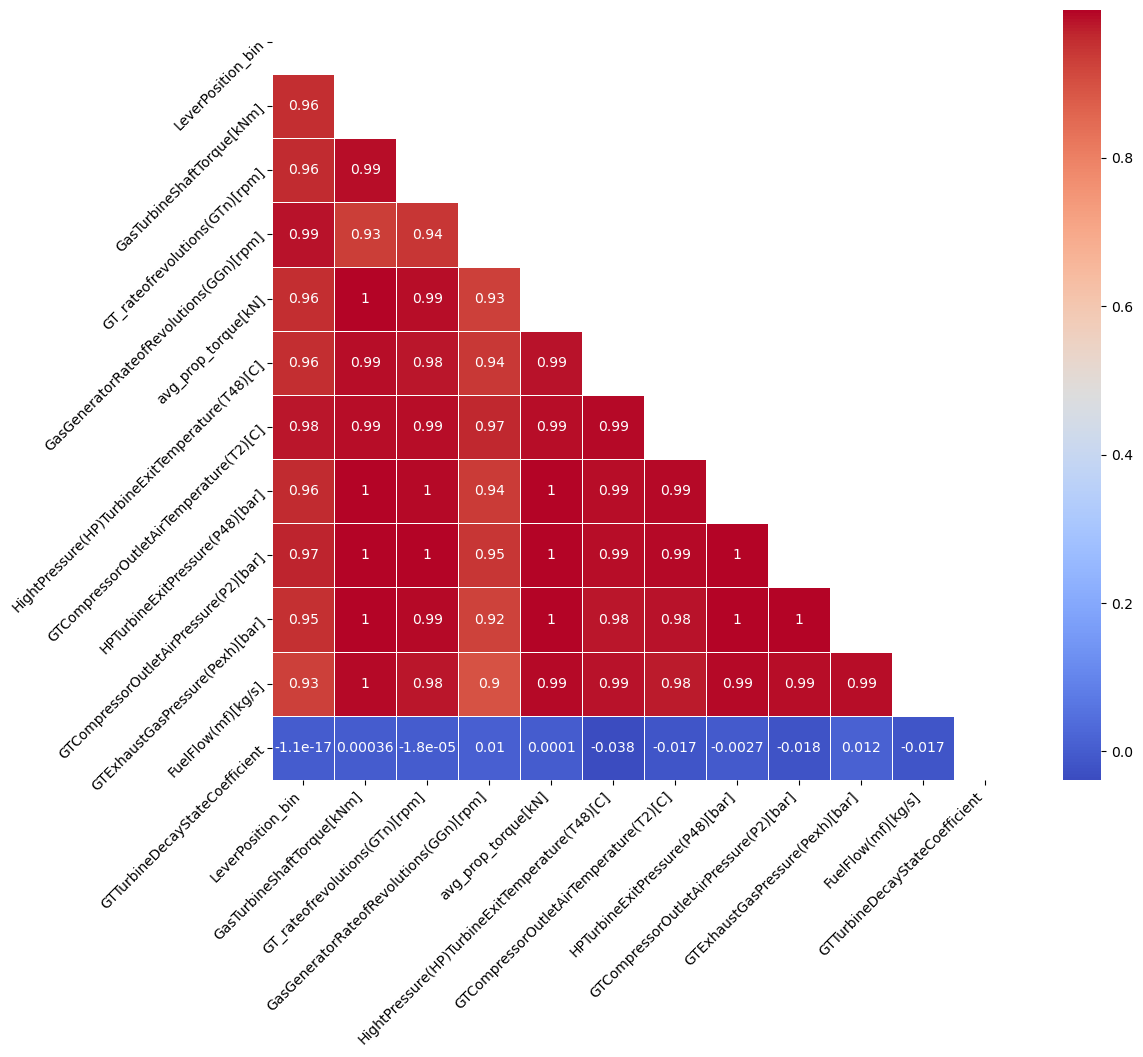

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation matrix
corr_matrix = data[['LeverPosition_bin', 'GasTurbineShaftTorque[kNm]', 'GT_rateofrevolutions(GTn)[rpm]',
             'GasGeneratorRateofRevolutions(GGn)[rpm]', 'avg_prop_torque[kN]', 
             'HightPressure(HP)TurbineExitTemperature(T48)[C]', 'GTCompressorOutletAirTemperature(T2)[C]',
             'HPTurbineExitPressure(P48)[bar]', 'GTCompressorOutletAirPressure(P2)[bar]',
             'GTExhaustGasPressure(Pexh)[bar]', 'FuelFlow(mf)[kg/s]','GTTurbineDecayStateCoefficient']].corr()

# Create a mask to display only one triangle of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', annot_kws={"size": 10}, linewidths=.5)

# Rotate the x and y labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, rotation_mode='anchor', ha='right', fontsize=10)

# Display the heatmap
plt.show()


